In [1]:
!pip install geopandas shapely matplotlib

In [3]:


import geopandas as gpd
from shapely.geometry import LineString
import matplotlib.pyplot as plt

print ("Libraries imported successfuly")

Libraries imported successfuly


In [16]:
import geopandas as gpd
from shapely.geometry import LineString

roads= gpd.GeoDataFrame({
    "id":[1,2],
    "geometry": [
                 LineString ([(0,0),(10,10)]),
                 LineString ([(0,5),(10,5)])
                 ]
})

rivers= gpd.GeoDataFrame({
    "id":[1,2],
    "geometry": [
        LineString ([(0,10),(10,0)]),
        LineString ([(5,0),(5,10)])
        ]
})

print ("Roads:")
print (roads)
print ("\nRivers:")
print (rivers)

Roads:
   id                 geometry
0   1  LINESTRING (0 0, 10 10)
1   2   LINESTRING (0 5, 10 5)

Rivers:
   id                 geometry
0   1  LINESTRING (0 10, 10 0)
1   2   LINESTRING (5 0, 5 10)


In [17]:
errors = []
for road in roads.geometry:
    for river in rivers.geometry:
      if road.intersects(river):
        errors.append((road, river))
print ("Total intersections found: ", len(errors))

Total intersections found:  4


In [18]:
for road, river in errors:
  point =road.intersection (river)
  print("ERROR: Road crosses  river without bridge")
  print ("Location:", point)

ERROR: Road crosses  river without bridge
Location: POINT (5 5)
ERROR: Road crosses  river without bridge
Location: POINT (5 5)
ERROR: Road crosses  river without bridge
Location: POINT (5 5)
ERROR: Road crosses  river without bridge
Location: POINT (5 5)


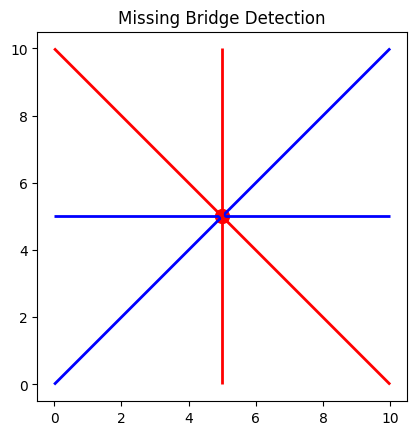

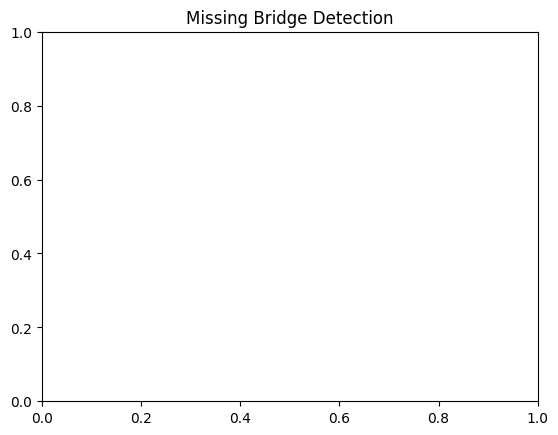

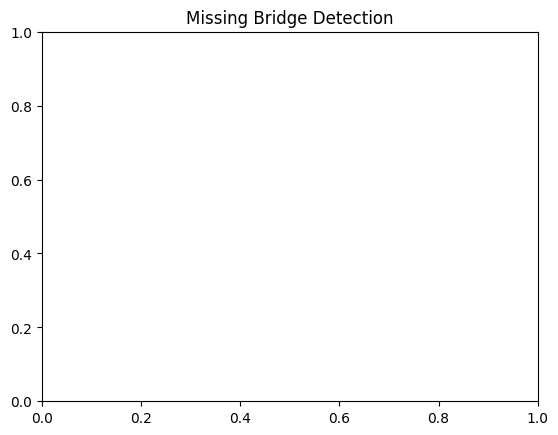

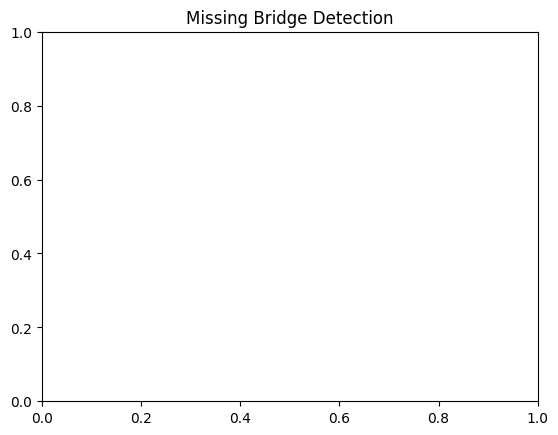

In [26]:
fig, ax = plt.subplots()
roads.plot(ax=ax, color="blue", linewidth=2, label="Road")
rivers.plot(ax=ax, color="red", linewidth=2, label="River")

for road, river in errors:
  point =road.intersection (river)
  ax.scatter(point.x, point.y, color="red", s=100)

  plt.title("Missing Bridge Detection")
  plt.show()

In [21]:
report  =[]
for road, river in errors:
  point =road.intersection(river)
  confidence= 0.90

  report.append({
      "Error Type": "Road crosses river without bridge",
      "X": round(point.x, 2),
      "Y": round(point.y, 2),
      "Confidence": confidence
  })
report

[{'Error Type': 'Road crosses river without bridge',
  'X': 5.0,
  'Y': 5.0,
  'Confidence': 0.9},
 {'Error Type': 'Road crosses river without bridge',
  'X': 5.0,
  'Y': 5.0,
  'Confidence': 0.9},
 {'Error Type': 'Road crosses river without bridge',
  'X': 5.0,
  'Y': 5.0,
  'Confidence': 0.9},
 {'Error Type': 'Road crosses river without bridge',
  'X': 5.0,
  'Y': 5.0,
  'Confidence': 0.9}]

In [22]:
for item in report:
  print ("Error:", item["Error Type"])
  print ("Location:", item["X"], ",", item["Y"])
  print ("Confidence:", item["Confidence"])
  print ("--------------------")

Error: Road crosses river without bridge
Location: 5.0 , 5.0
Confidence: 0.9
--------------------
Error: Road crosses river without bridge
Location: 5.0 , 5.0
Confidence: 0.9
--------------------
Error: Road crosses river without bridge
Location: 5.0 , 5.0
Confidence: 0.9
--------------------
Error: Road crosses river without bridge
Location: 5.0 , 5.0
Confidence: 0.9
--------------------


In [23]:
import pandas as pd

df =  pd.DataFrame(report)
df.to_csv("error_report.csv", index=False)

print("CSV file saved as error_report.csv")

CSV file saved as error_report.csv


In [24]:
from shapely.geometry import Point

bridges = gpd.GeoDataFrame({
    "id": [],
    "geometry": []
})
print("Bridges layer created")

Bridges layer created


In [25]:
errors=[]
for road in roads.geometry:
  for river in rivers.geometry:
    if road.intersects(river):
      cross_point = road.intersection(river)

      bridge_found= False
      for bridge in bridges.geometry:
        if cross_point.distance(bridge) < 0.5:
          bridge_found= True
          break
      if not bridge_found:
        errors.append((road, river))